In [4]:
import numpy as np
import matplotlib.pyplot as plt
import scipy.io.wavfile as wav
from scipy.fft import fft, fftfreq
from scipy.signal import find_peaks
from librosa import hz_to_note

In [5]:
sample_rate, audio_data = wav.read("chords/CmajMelody1.wav")

In [6]:
# if we have stereo input
if len(audio_data.shape) == 2:
    # pick out only one channel
    audio_data = audio_data[:, 0]

audio_data

array([  0,   0,   0, ..., -14, -14, -14], dtype=int16)

In [7]:
# Perform Fourier Transform
# Note: Contains complex numbers representing the frequency components
fft_result = fft(audio_data)

# Calculate Frequencies
fft_freq = fftfreq(len(audio_data), d=1/sample_rate)

In [8]:
for i in range(10):
    print(f"Frequency {fft_freq[i]} Hz, Magnitude: {abs(fft_result[i])}")

Frequency 0.0 Hz, Magnitude: 18970.0
Frequency 0.09237072287945305 Hz, Magnitude: 1149.606356369974
Frequency 0.1847414457589061 Hz, Magnitude: 2220.972392744737
Frequency 0.2771121686383592 Hz, Magnitude: 2886.224985854517
Frequency 0.3694828915178122 Hz, Magnitude: 2273.8869207325342
Frequency 0.46185361439726524 Hz, Magnitude: 2146.4577901428206
Frequency 0.5542243372767184 Hz, Magnitude: 1212.1488366432354
Frequency 0.6465950601561714 Hz, Magnitude: 1097.785095005226
Frequency 0.7389657830356244 Hz, Magnitude: 1508.770901080985
Frequency 0.8313365059150775 Hz, Magnitude: 1771.893523164115


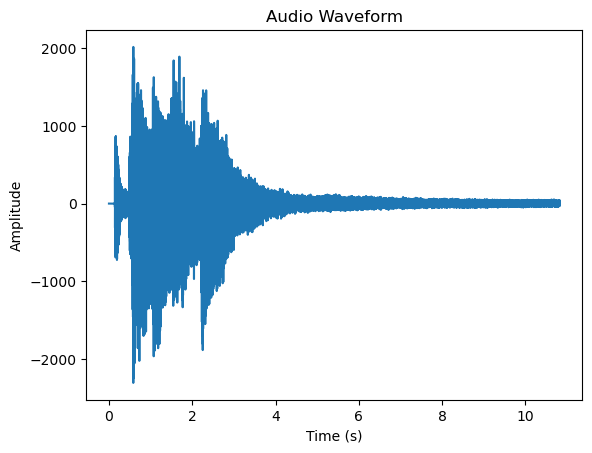

In [9]:
# Time domain Plot
time = np.arange(len(audio_data)) / sample_rate  # Create time axis
plt.plot(time, audio_data)
plt.xlabel("Time (s)")
plt.ylabel("Amplitude")
plt.title("Audio Waveform")
plt.show()

In [10]:
# Isolating positive frequencies
# Note: only first half of values are unique/positive
n = len(fft_freq) - 1
abs_fft_result = abs(fft_result)**2
pos_fft_freq = fft_freq[:n // 2]
pos_fft_result = abs_fft_result[:n // 2]

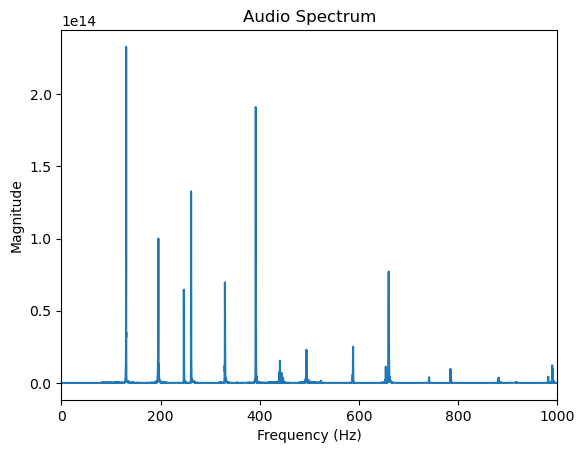

In [11]:
# Frequency Domain Plot

plt.plot(pos_fft_freq, pos_fft_result)  # Plot absolute values of frequency components
plt.xlim(0, 1000)
plt.xlabel("Frequency (Hz)")
plt.ylabel("Magnitude")
plt.title("Audio Spectrum")
plt.show()

In [12]:
# Extracting notes from the frequency domain plot
max_freq = np.argmax(pos_fft_result)
print(pos_fft_freq[max_freq])

130.51983142866717


In [13]:
# Note: Distance between note frequencies becomes smaller in the lower ranges
# https://mixbutton.com/mixing-articles/music-note-to-frequency-chart/
peaks, _ = find_peaks(pos_fft_result, prominence=5e13, distance=30)

In [14]:
pos_fft_freq[peaks].shape

(7,)

In [18]:
note_frequencies = pos_fft_freq[peaks]
note_frequencies

array([130.51983143, 195.45644961, 246.81457153, 261.40914575,
       329.67110996, 391.83660645, 659.89644425])

In [17]:
hz_to_note(note_frequencies)

array(['C3', 'G3', 'B3', 'C4', 'E4', 'G4', 'E5'], dtype='<U2')

Next Goal: Split the Audio signal into many small "time" chunks to find the ordering of the notes in the song
and consider making an adaptive method that finds the period of the signal and decomposes over adaptive ranges